In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

from modules.read_text import read_text as rt

In [2]:
img = cv2.imread('pictures/UrtekramMysli.jpg')





brand, name = print(rt.get_txt(img))

('urtekram', 'musli')


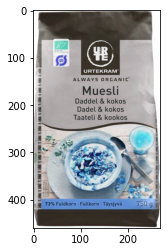

In [3]:



plt.imshow(img)


In [4]:
from modules.scraping.main import get_cereal

c = get_cereal("Cornflakes", "Kellogg's")
print(len(c))
for ce in c:
    print(
        ce.name,
        ce.brand,
        ce.grams,
        ce.price,
        ce.nutrition.fat,
        ce.nutrition.protein,
        ce.nutrition.carbohydrates,
        ce.nutrition.fiber,
        ce.nutrition.salt,
    )

3
33s+56
32,0###### 